In [3]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from pmdarima.arima import OCSBTest
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import seaborn as sns
import yfinance
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [4]:
raw_data = yfinance.download(tickers="VOW3.DE, PAH3.DE, BMW.DE", 
                             interval="1d", 
                             group_by='ticker', 
                             auto_adjust=True, 
                             threads=True)

[*********************100%***********************]  3 of 3 completed


In [5]:
df = raw_data.copy()

In [7]:
# Définition des dates importantes pour l'analyse

# Date de début de l'analyse
start_date = '2018-01-01'  # Début d'une période économique importante

# Première annonce officielle ou événement majeur
ann_1 = '2020-03-11'  # Déclaration de la pandémie COVID-19

# Date intermédiaire importante
g_date = '2021-01-01'  # Début de la vaccination massive contre la COVID-19

# Deuxième annonce officielle ou événement majeur
ann_2 = '2022-02-24'  # Début de la crise géopolitique en Ukraine

# Date de fin de l'analyse
end_date = '2024-01-01'  # Date récente pour une étude actuelle

# Affichage des dates pour vérifier
print(f"Start Date: {start_date}")
print(f"First Announcement: {ann_1}")
print(f"Intermediate Date (g_date): {g_date}")
print(f"Second Announcement: {ann_2}")
print(f"End Date: {end_date}")



Start Date: 2018-01-01
First Announcement: 2020-03-11
Intermediate Date (g_date): 2021-01-01
Second Announcement: 2022-02-24
End Date: 2024-01-01


In [19]:

import pandas as pd

# Exemple de dataframe avec MultiIndex (assurez-vous que votre dataframe est correctement chargé)
# df = pd.read_csv("votre_fichier.csv", header=[0, 1], index_col=0)

# Extraction des cours de clôture
df['vol'] = df[('VOW3.DE', 'Close')]  # Clôture de VOW3.DE
df['por'] = df[('PAH3.DE', 'Close')]  # Clôture de PAH3.DE
df['bmw'] = df[('BMW.DE', 'Close')]   # Clôture de BMW.DE

# Gestion des NaN : remplir les valeurs manquantes avec 0 (ou une autre méthode)
df['vol'].fillna(0, inplace=True)
df['por'].fillna(0, inplace=True)
df['bmw'].fillna(0, inplace=True)

# Création des rendements (pourcentage de changement)
df['ret_vol'] = df['vol'].pct_change(1).mul(100)
df['ret_por'] = df['por'].pct_change(1).mul(100)
df['ret_bmw'] = df['bmw'].pct_change(1).mul(100)

# Création des rendements carrés
df['sq_vol'] = df['ret_vol'].mul(df['ret_vol'])
df['sq_por'] = df['ret_por'].mul(df['ret_por'])
df['sq_bmw'] = df['ret_bmw'].mul(df['ret_bmw'])

# Extraction des volumes pour chaque ticker
df['q_vol'] = df[('VOW3.DE', 'Volume')]  # Volume de VOW3.DE
df['q_por'] = df[('PAH3.DE', 'Volume')]  # Volume de PAH3.DE
df['q_bmw'] = df[('BMW.DE', 'Volume')]   # Volume de BMW.DE

# Gestion des NaN dans les volumes (si nécessaire)
df['q_vol'].fillna(0, inplace=True)
df['q_por'].fillna(0, inplace=True)
df['q_bmw'].fillna(0, inplace=True)

# Affichage des colonnes du DataFrame après traitement
print(df.columns)

# Affichage du dataframe final pour vérifier les résultats
print(df.head())



MultiIndex([('PAH3.DE',   'Open'),
            ('PAH3.DE',   'High'),
            ('PAH3.DE',    'Low'),
            ('PAH3.DE',  'Close'),
            ('PAH3.DE', 'Volume'),
            ('VOW3.DE',   'Open'),
            ('VOW3.DE',   'High'),
            ('VOW3.DE',    'Low'),
            ('VOW3.DE',  'Close'),
            ('VOW3.DE', 'Volume'),
            ( 'BMW.DE',   'Open'),
            ( 'BMW.DE',   'High'),
            ( 'BMW.DE',    'Low'),
            ( 'BMW.DE',  'Close'),
            ( 'BMW.DE', 'Volume'),
            (    'vol',       ''),
            (    'por',       ''),
            (    'bmw',       ''),
            ('ret_vol',       ''),
            ('ret_por',       ''),
            ('ret_bmw',       ''),
            ( 'sq_vol',       ''),
            ( 'sq_por',       ''),
            ( 'sq_bmw',       ''),
            (  'q_vol',       ''),
            (  'q_por',       ''),
            (  'q_bmw',       '')],
           names=['Ticker', 'Price'])
Ticker     PAH3.

In [17]:
print(df.columns)


MultiIndex([('PAH3.DE',   'Open'),
            ('PAH3.DE',   'High'),
            ('PAH3.DE',    'Low'),
            ('PAH3.DE',  'Close'),
            ('PAH3.DE', 'Volume'),
            ('VOW3.DE',   'Open'),
            ('VOW3.DE',   'High'),
            ('VOW3.DE',    'Low'),
            ('VOW3.DE',  'Close'),
            ('VOW3.DE', 'Volume'),
            ( 'BMW.DE',   'Open'),
            ( 'BMW.DE',   'High'),
            ( 'BMW.DE',    'Low'),
            ( 'BMW.DE',  'Close'),
            ( 'BMW.DE', 'Volume')],
           names=['Ticker', 'Price'])


In [18]:
print(df.head())


Ticker     PAH3.DE                       VOW3.DE                        \
Price         Open High Low Close Volume    Open High Low Close Volume   
Date                                                                     
1996-11-08     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-11     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-12     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-13     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   
1996-11-14     NaN  NaN NaN   NaN    NaN     NaN  NaN NaN   NaN    NaN   

Ticker        BMW.DE                                         
Price           Open      High       Low     Close   Volume  
Date                                                         
1996-11-08  8.117676  8.117676  8.100290  8.100290   767000  
1996-11-11  8.108761  8.113219  8.060617  8.078447   260000  
1996-11-12  8.095832  8.170278  8.065073  8.139520  1066000  
1996-11-13  8.177411  8.177411  8.1

In [20]:
df = df.asfreq('B')
df = df.fillna(method='bfill')

In [21]:
del df['VOW3.DE']
del df['PAH3.DE']
del df['BMW.DE']

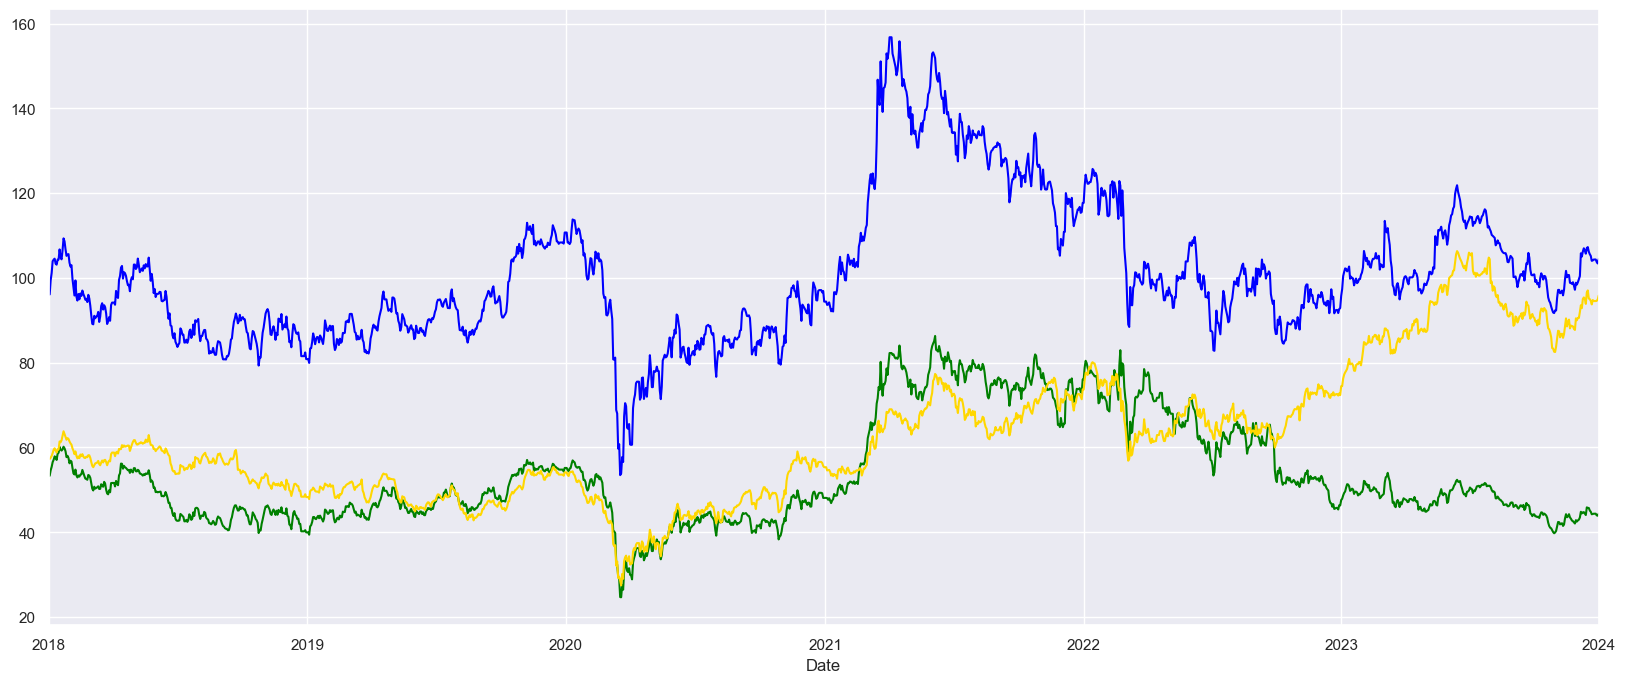

In [22]:
df['vol'][start_date:end_date].plot(figsize=(20, 8), color="blue")
df['por'][start_date:end_date].plot(color="green")
df['bmw'][start_date:end_date].plot(color="gold")
plt.show()

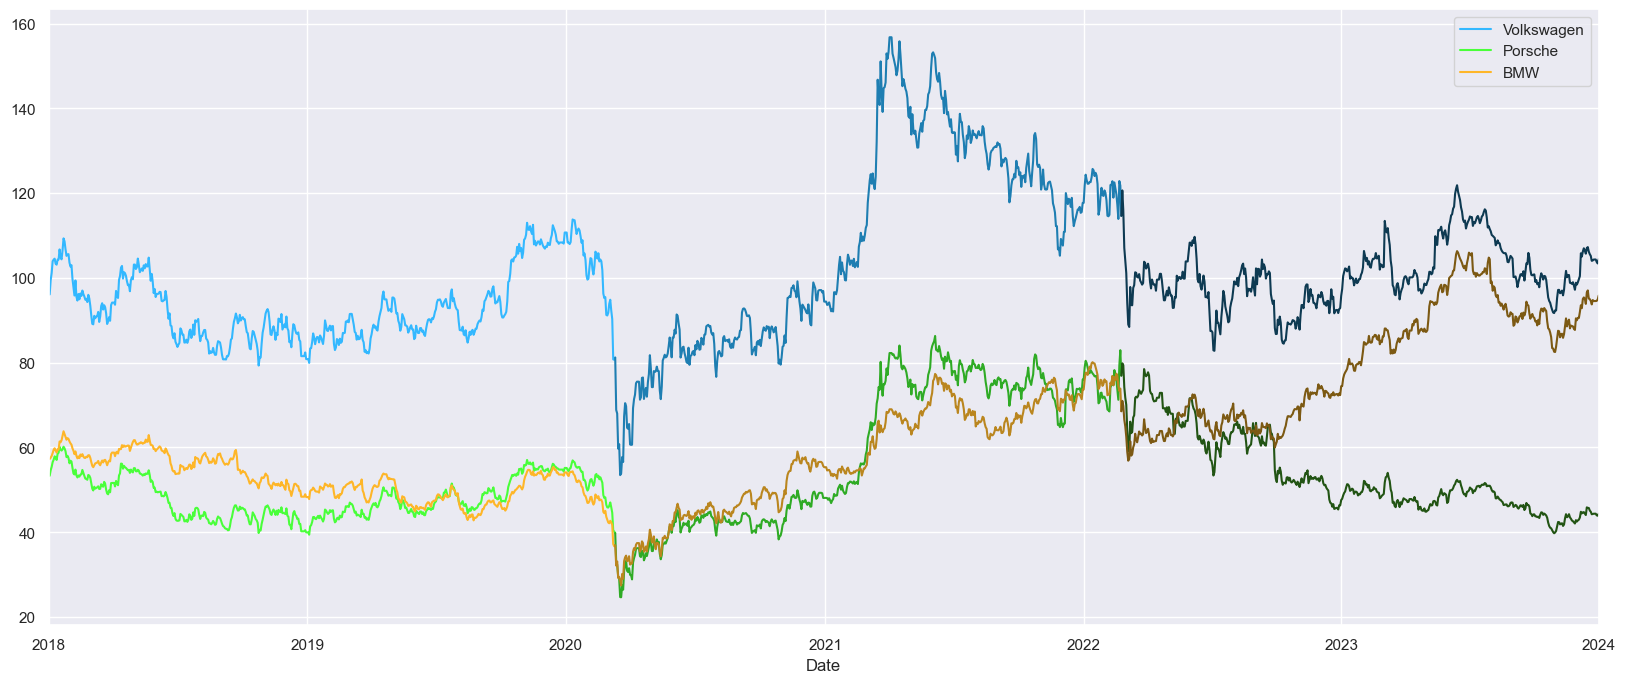

In [23]:
df['vol'][start_date:ann_1].plot(figsize=(20, 8), color="#33B8FF")
df['por'][start_date:ann_1].plot(color="#49FF3A")
df['bmw'][start_date:ann_1].plot(color="#FEB628")

df['vol'][ann_1:ann_2].plot(color="#1E7EB2")
df['por'][ann_1:ann_2].plot(color="#2FAB25")
df['bmw'][ann_1:ann_2].plot(color="#BA861F")

df['vol'][ann_2:end_date].plot(color="#0E3A52")
df['por'][ann_2:end_date].plot(color="#225414")
df['bmw'][ann_2:end_date].plot(color="#7C5913")

plt.legend(['Volkswagen', 'Porsche', 'BMW'])
plt.show()

In [24]:
print('Correlation among manufacturers from ' + str(start_date) + ' to ' + str(end_date) + ':')
print('Volkswagen and Porsche correlation: \t' + str(df['vol'][start_date:end_date].corr(df['por'][start_date:end_date])))
print('Volkswagen and BMW correlation: \t' + str(df['vol'][start_date:end_date].corr(df['bmw'][start_date:end_date])))
print('Porsche and BMW correlation: \t\t' + str(df['por'][start_date:end_date].corr(df['bmw'][start_date:end_date])))

Correlation among manufacturers from 2018-01-01 to 2024-01-01:
Volkswagen and Porsche correlation: 	0.8463576905200331
Volkswagen and BMW correlation: 	0.49754447254418793
Porsche and BMW correlation: 		0.28763026141779513


In [28]:
print('Corrélation entre les manufacturers de ' + str(start_date) + ' à ' + str(ann_1) + ' :')
print('Volkswagen et Porsche corrélation: \t' + str(df['vol'][start_date:ann_1].corr(df['por'][start_date:ann_1])))
print('Volkswagen et BMW corrélation: \t' + str(df['vol'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))
print('Porsche et BMW corrélation: \t\t' + str(df['por'][start_date:ann_1].corr(df['bmw'][start_date:ann_1])))

Corrélation entre les manufacturers de 2018-01-01 à 2020-03-11 :
Volkswagen et Porsche corrélation: 	0.9381690015771956
Volkswagen et BMW corrélation: 	0.3015063117660181
Porsche et BMW corrélation: 		0.42720076322929573


In [29]:
print('Corrélation entre les manufacturers de ' + str(ann_1) + ' à ' + str(ann_2) + ' :')
print('Volkswagen et Porsche corrélation: \t' + str(df['vol'][ann_1:ann_2].corr(df['por'][ann_1:ann_2])))
print('Volkswagen et BMW corrélation: \t' + str(df['vol'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))
print('Porsche et BMW corrélation: \t\t' + str(df['por'][ann_1:ann_2].corr(df['bmw'][ann_1:ann_2])))

Corrélation entre les manufacturers de 2020-03-11 à 2022-02-24 :
Volkswagen et Porsche corrélation: 	0.964284023209051
Volkswagen et BMW corrélation: 	0.881714136813826
Porsche et BMW corrélation: 		0.9432263624957726


In [30]:
print('Corrélation entre les constructeurs de ' + str(end_date) + ' à ' + str(df.index[-1]) + ' :')
print('Volkswagen et Porsche corrélation: \t' + str(df['vol'][end_date:].corr(df['por'][end_date:])))
print('Volkswagen et BMW corrélation: \t' + str(df['vol'][end_date:].corr(df['bmw'][end_date:])))
print('Porsche et BMW corrélation: \t\t' + str(df['por'][end_date:].corr(df['bmw'][end_date:])))

Corrélation entre les constructeurs de 2024-01-01 à 2024-12-13 00:00:00 :
Volkswagen et Porsche corrélation: 	0.9585029661398615
Volkswagen et BMW corrélation: 	0.9366783595034598
Porsche et BMW corrélation: 		0.914579641303121


In [31]:
mod_pre_vol = auto_arima(df['vol'][start_date:ann_1], exogenous=df[['por', 'bmw']][start_date:ann_1],
                        m=5, max_p=5, max_q=5)

mod_btn_vol = auto_arima(df['vol'][ann_1:ann_2], exogenous=df[['por', 'bmw']][ann_1:ann_2],
                        m=5, max_p=5, max_q=5)

mod_post_vol = auto_arima(df['vol'][ann_2:end_date], exogenous=df[['por', 'bmw']][ann_2:end_date],
                         m=5, max_p=5, max_q=5)

mod_pre_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  573
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1063.998
Date:                Sun, 15 Dec 2024   AIC                           2129.996
Time:                        17:30:12   BIC                           2134.345
Sample:                    01-01-2018   HQIC                          2131.692
                         - 03-11-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.4167      0.096     25.292      0.000       2.229       2.604
===================================================================================
Ljung-Box (L1) (Q):                   3.48   Jarque-Bera (JB):               154.86
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                            -0.35
Prob(H) (two-sided):                  0.48   Kurtosis:                         5.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
mod_pr_pre_por = auto_arima(df['por'][start_date:ann_1], exogenous=df[['vol', 'bmw']][start_date:ann_1],
                        m=5, max_p=5, max_q=5)

mod_pr_btn_por = auto_arima(df['por'][ann_1:ann_2], exogenous=df[['vol', 'bmw']][ann_1:ann_2],
                        m=5, max_p=5, max_q=5)

mod_pr_post_por = auto_arima(df['por'][ann_2:end_date], exogenous=df[['vol', 'bmw']][ann_2:end_date],
                         m=5, max_p=5, max_q=5)

In [35]:
mod_pr_pre_por.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  573
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -665.940
Date:                Sun, 15 Dec 2024   AIC                           1335.880
Time:                        17:39:56   BIC                           1344.578
Sample:                    01-01-2018   HQIC                          1339.273
                         - 03-11-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1193      0.045      2.634      0.008       0.031       0.208
sigma2         0.6008      0.028     21.709      0.000       0.547       0.655
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                57.11
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.07
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

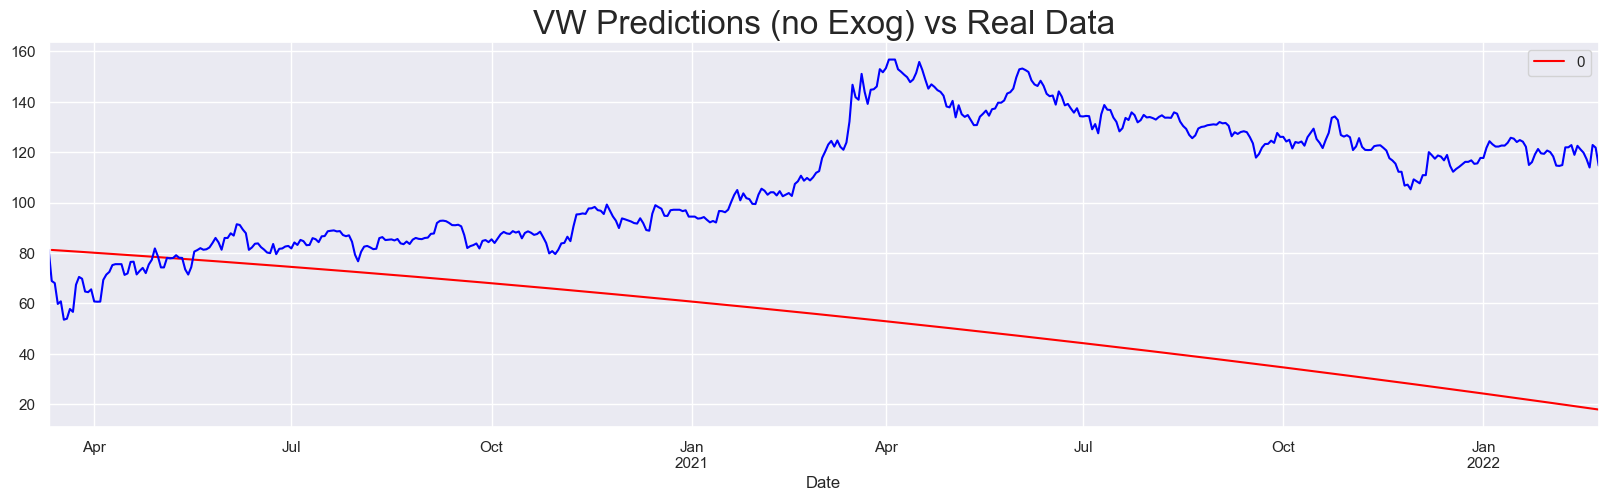

In [36]:
model_auto_pred_gr = auto_arima(df['vol'][start_date:ann_1], m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2])),
                              index=df[ann_1:ann_2].index)
df_auto_pred_gr[ann_1:ann_2].plot(figsize=(20, 5), color='red')

df['vol'][ann_1:ann_2].plot(color='blue')
plt.title("VW Predictions (no Exog) vs Real Data", size=24)
plt.show()

Start Date: 2018-01-01
First Announcement: 2020-03-11
Intermediate Date (g_date): 2021-01-01
Second Announcement: 2022-02-24
End Date: 2024-01-01


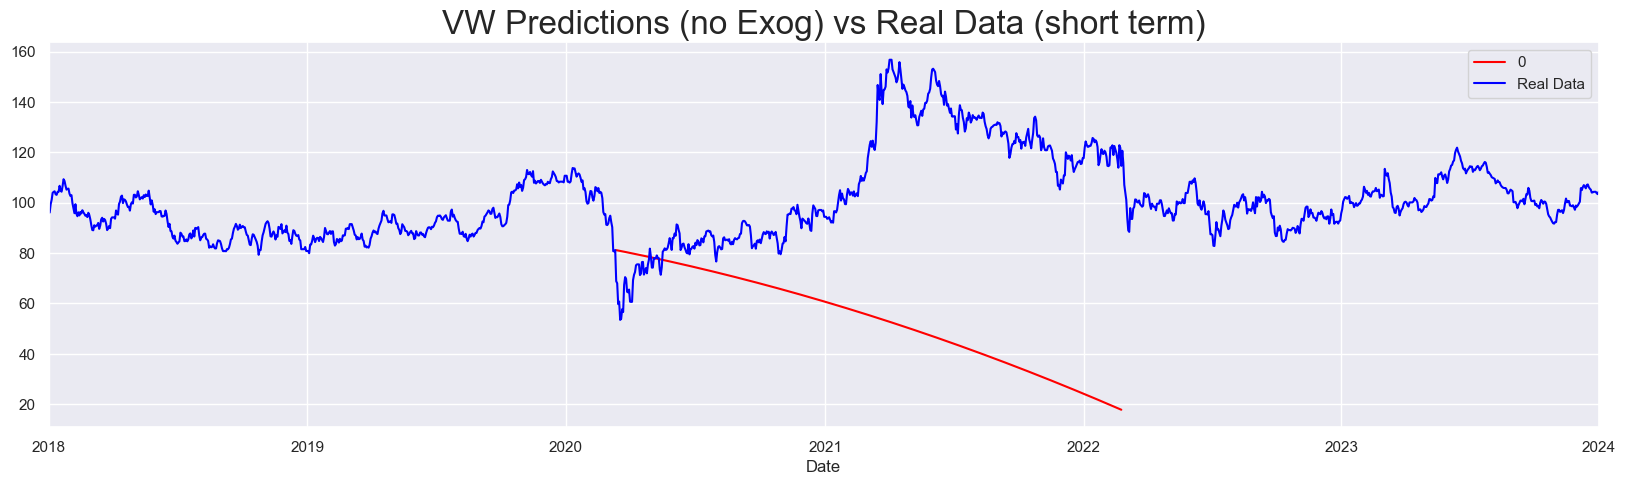

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Définition des dates importantes pour l'analyse
start_date = '2018-01-01'  # Début d'une période économique importante
ann_1 = '2020-03-11'  # Déclaration de la pandémie COVID-19
g_date = '2021-01-01'  # Début de la vaccination massive contre la COVID-19
ann_2 = '2022-02-24'  # Début de la crise géopolitique en Ukraine
end_date = '2024-01-01'  # Date récente pour une étude actuelle

# Affichage des dates pour vérifier
print(f"Start Date: {start_date}")
print(f"First Announcement: {ann_1}")
print(f"Intermediate Date (g_date): {g_date}")
print(f"Second Announcement: {ann_2}")
print(f"End Date: {end_date}")

# Exemple de DataFrame avec index de dates (assurez-vous que vos DataFrame ont bien un index de type DatetimeIndex)
df_auto_pred_gr.index = pd.to_datetime(df_auto_pred_gr.index)  # Assurez-vous que l'index est au format datetime
df.index = pd.to_datetime(df.index)

# Tracer les prédictions (df_auto_pred_gr) et les données réelles (df) sur la période spécifiée
df_auto_pred_gr.loc[start_date:end_date].plot(figsize=(20, 5), color='red', label='Predictions')
df['vol'].loc[start_date:end_date].plot(color='blue', label='Real Data')

# Ajouter un titre et des légendes
plt.title("VW Predictions (no Exog) vs Real Data (short term)", size=24)
plt.legend()

# Afficher le graphique
plt.show()



Date range in df_auto_pred_gr:  2020-03-11 00:00:00 to 2022-02-24 00:00:00
Date range in df:  1996-11-08 00:00:00 to 2024-12-13 00:00:00


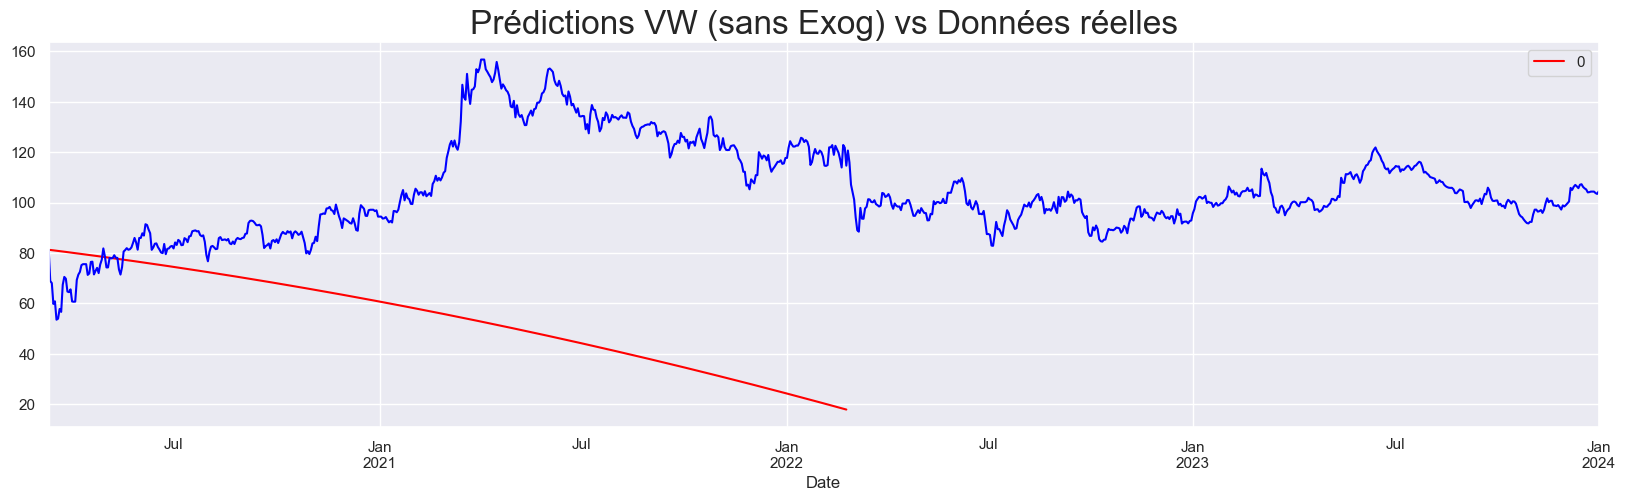

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir les dates en datetime
start_date = pd.to_datetime('2018-01-01')  # Début d'une période économique importante
ann_1 = pd.to_datetime('2020-03-11')  # Déclaration de la pandémie COVID-19
g_date = pd.to_datetime('2021-01-01')  # Début de la vaccination massive contre la COVID-19
ann_2 = pd.to_datetime('2022-02-24')  # Début de la crise géopolitique en Ukraine
end_date = pd.to_datetime('2024-01-01')  # Date de fin de l'analyse

# Assurez-vous que les index des DataFrames sont au format datetime
df_auto_pred_gr.index = pd.to_datetime(df_auto_pred_gr.index)
df.index = pd.to_datetime(df.index)

# Vérifier que la période est couverte dans les données
print("Date range in df_auto_pred_gr: ", df_auto_pred_gr.index.min(), "to", df_auto_pred_gr.index.max())
print("Date range in df: ", df.index.min(), "to", df.index.max())

# Vérifier que la plage de dates est incluse dans les données avant de tracer
if ann_1 >= df_auto_pred_gr.index.min() and ann_1 <= df_auto_pred_gr.index.max():
    df_auto_pred_gr.loc[ann_1:end_date].plot(figsize=(20, 5), color='red')

if ann_1 >= df.index.min() and ann_1 <= df.index.max():
    df.loc[ann_1:end_date, 'vol'].plot(color='blue')

# Ajouter un titre et des légendes
plt.title("Prédictions VW (sans Exog) vs Données réelles", size=24)
plt.show()


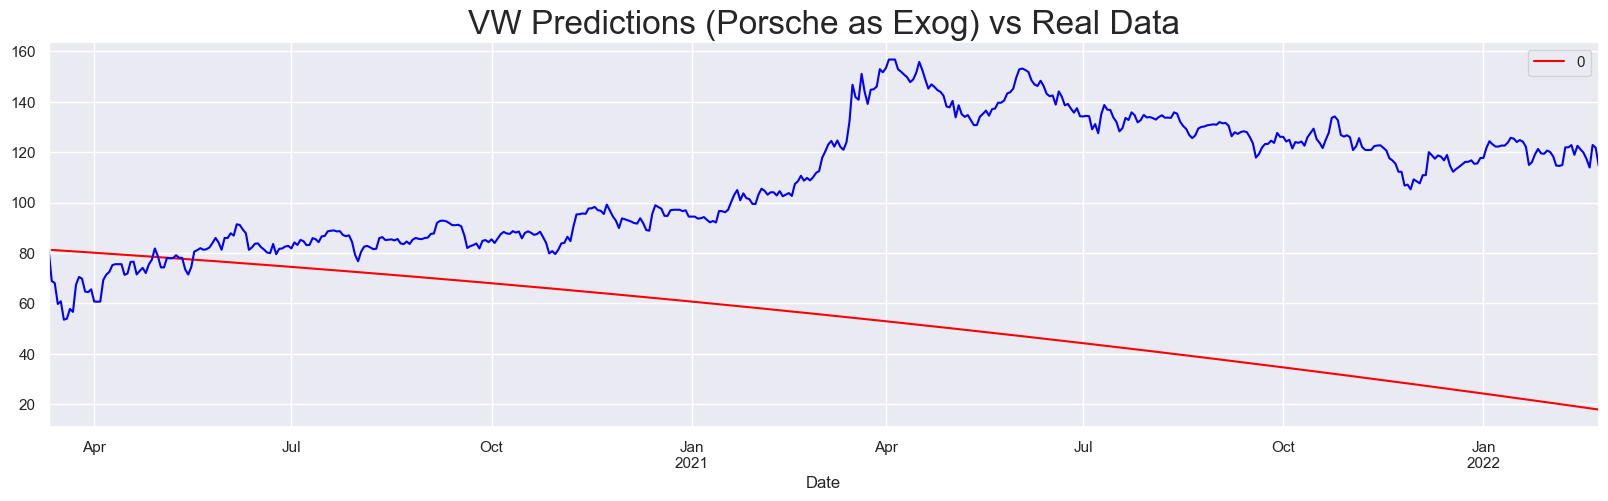

In [51]:
model_auto_pred_gr = auto_arima(df['vol'][start_date:ann_1], exogenous=df[['por']][start_date:ann_1],
                        m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por']][ann_1:ann_2]),
                              index=df[ann_1:ann_2].index)

df_auto_pred_gr[ann_1:ann_2].plot(figsize=(20, 5), color='red')

df['vol'][ann_1:ann_2].plot(color='blue')
plt.title("VW Predictions (Porsche as Exog) vs Real Data", size=24)
plt.show()

<Figure size 2000x500 with 0 Axes>

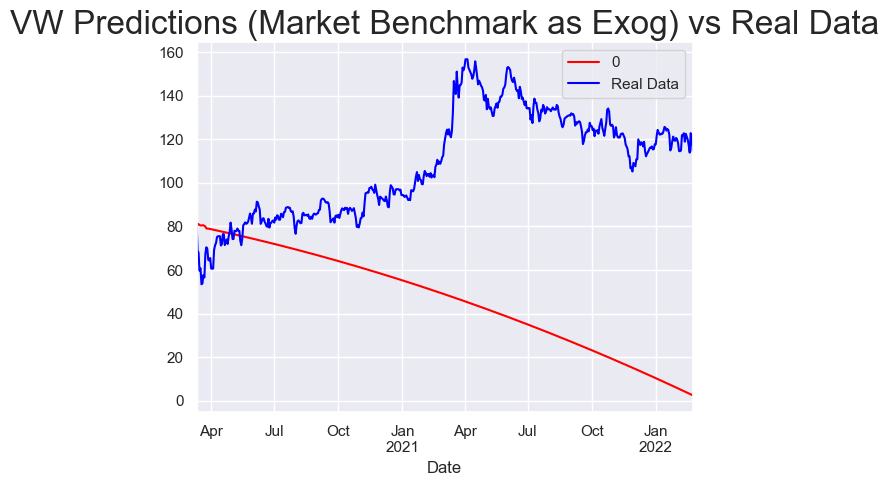

In [53]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = pd.to_datetime('2018-01-01')
ann_1 = pd.to_datetime('2020-03-11')
ann_2 = pd.to_datetime('2022-02-24')

# S'assurer que l'index des DataFrames est bien au format datetime
df.index = pd.to_datetime(df.index)

# Ajustement du modèle ARIMA avec les données exogènes BMW
model_auto_pred_gr = auto_arima(df['vol'][start_date:ann_1], exogenous=df[['bmw']][start_date:ann_1],
                                m=12,  # Si la saisonnalité est annuelle, m=12 pour 12 mois par an
                                max_p=5, max_q=5, max_P=3, max_Q=3, trend='ct', 
                                seasonal=True, stepwise=True)

# Prédictions pour la période entre ann_1 et ann_2
df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2]), 
                                                          exogenous=df[['bmw']][ann_1:ann_2]),
                               index=df[ann_1:ann_2].index)

# Tracer les prédictions et les données réelles
plt.figure(figsize=(20, 5))
df_auto_pred_gr.plot(color='red', label="Predictions")
df['vol'][ann_1:ann_2].plot(color='blue', label="Real Data")

# Ajouter un titre et une légende
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size=24)
plt.legend()
plt.show()


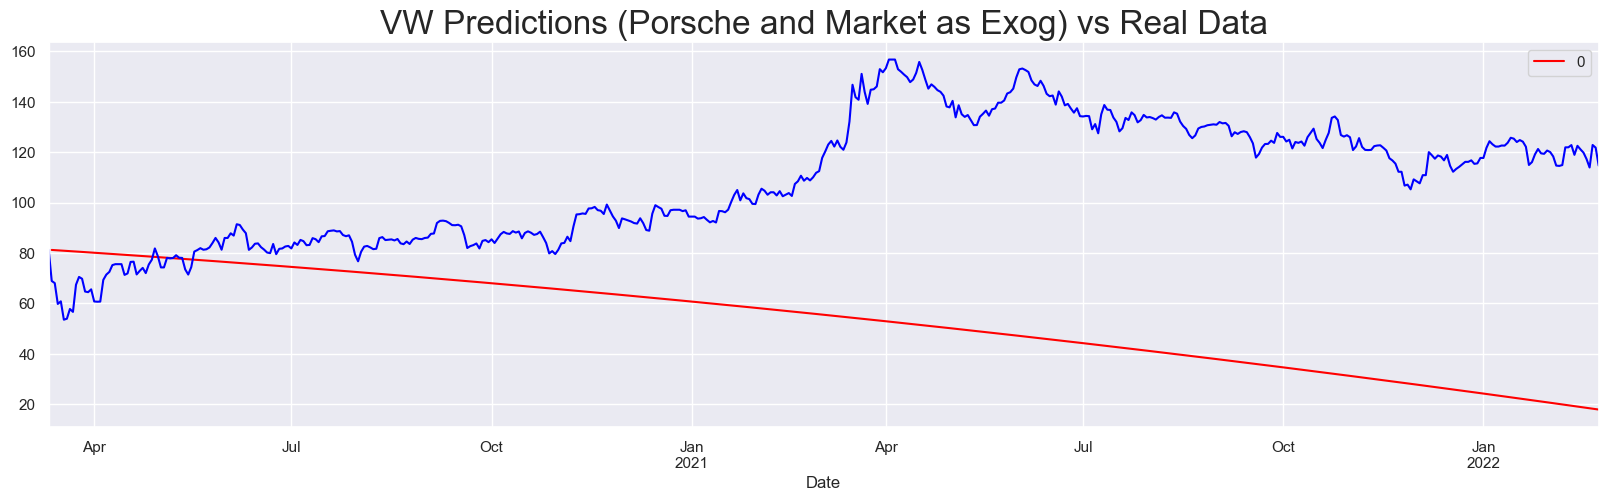

In [54]:
model_auto_pred_gr = auto_arima(df['vol'][start_date:ann_1], exogenous=df[['por', 'bmw']][start_date:ann_1],
                        m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2]), exogenous=df[['por', 'bmw']][ann_1:ann_2]),
                              index=df[ann_1:ann_2].index)

df_auto_pred_gr[ann_1:ann_2].plot(figsize=(20, 5), color='red')

df['vol'][ann_1:ann_2].plot(color='blue')
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size=24)
plt.show()

<Figure size 2000x500 with 0 Axes>

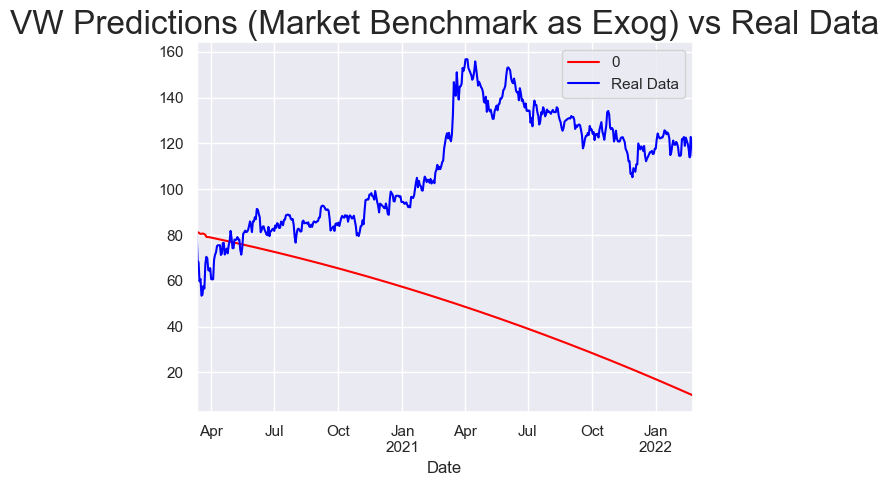

In [56]:
    from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = pd.to_datetime('2018-01-01')
ann_1 = pd.to_datetime('2020-03-11')
ann_2 = pd.to_datetime('2022-02-24')

# Assurez-vous que l'index des DataFrames est bien au format datetime
df.index = pd.to_datetime(df.index)

# Appliquer une différenciation si nécessaire
df['vol_diff'] = df['vol'].diff().dropna()

# Ajustement du modèle ARIMA avec les données exogènes BMW
model_auto_pred_gr = auto_arima(df['vol_diff'][start_date:ann_1], exogenous=df[['bmw']][start_date:ann_1],
                                m=12,  # Saison annuelle
                                max_p=5, max_q=5, max_P=3, max_Q=3, trend='ct', 
                                seasonal=True, stepwise=True)

# Prédictions pour la période entre ann_1 et ann_2
df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2]), 
                                                          exogenous=df[['bmw']][ann_1:ann_2]),
                               index=df[ann_1:ann_2].index)

# Revenir à la série originale après la différenciation
df_auto_pred_gr_original = df_auto_pred_gr.cumsum() + df['vol'].loc[start_date:ann_1].iloc[-1]

# Tracer les prédictions et les données réelles
plt.figure(figsize=(20, 5))
df_auto_pred_gr_original.plot(color='red', label="Predictions")
df['vol'][ann_1:ann_2].plot(color='blue', label="Real Data")

# Ajouter un titre et une légende
plt.title("VW Predictions (Market Benchmark as Exog) vs Real Data", size=24)
plt.legend()
plt.show()


<Figure size 2000x500 with 0 Axes>

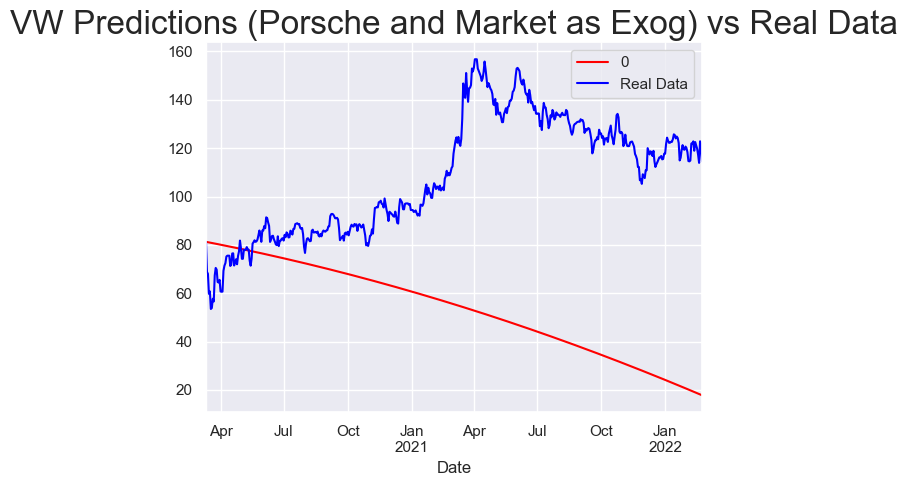

In [57]:
from pmdarima import auto_arima
import pandas as pd
import matplotlib.pyplot as plt

# Définir les dates de début et de fin
start_date = pd.to_datetime('2018-01-01')
ann_1 = pd.to_datetime('2020-03-11')
ann_2 = pd.to_datetime('2022-02-24')

# Assurez-vous que l'index est au format datetime
df.index = pd.to_datetime(df.index)

# Ajustement du modèle ARIMA avec les données exogènes 'por' et 'bmw'
model_auto_pred_gr = auto_arima(df['vol'].loc[start_date:ann_1], exogenous=df[['por', 'bmw']].loc[start_date:ann_1],
                                m=5, max_p=5, max_q=5, max_P=5, max_Q=5, trend='ct')

# Prédictions pour la période entre ann_1 et ann_2
df_auto_pred_gr = pd.DataFrame(model_auto_pred_gr.predict(n_periods=len(df[ann_1:ann_2]), 
                                                          exogenous=df[['por', 'bmw']].loc[ann_1:ann_2]),
                               index=df[ann_1:ann_2].index)

# Tracer les prédictions et les données réelles
plt.figure(figsize=(20, 5))
df_auto_pred_gr.plot(color='red', label="Predictions")
df['vol'].loc[ann_1:ann_2].plot(color='blue', label="Real Data")

# Ajouter un titre et une légende
plt.title("VW Predictions (Porsche and Market as Exog) vs Real Data", size=24)
plt.legend()
plt.show()


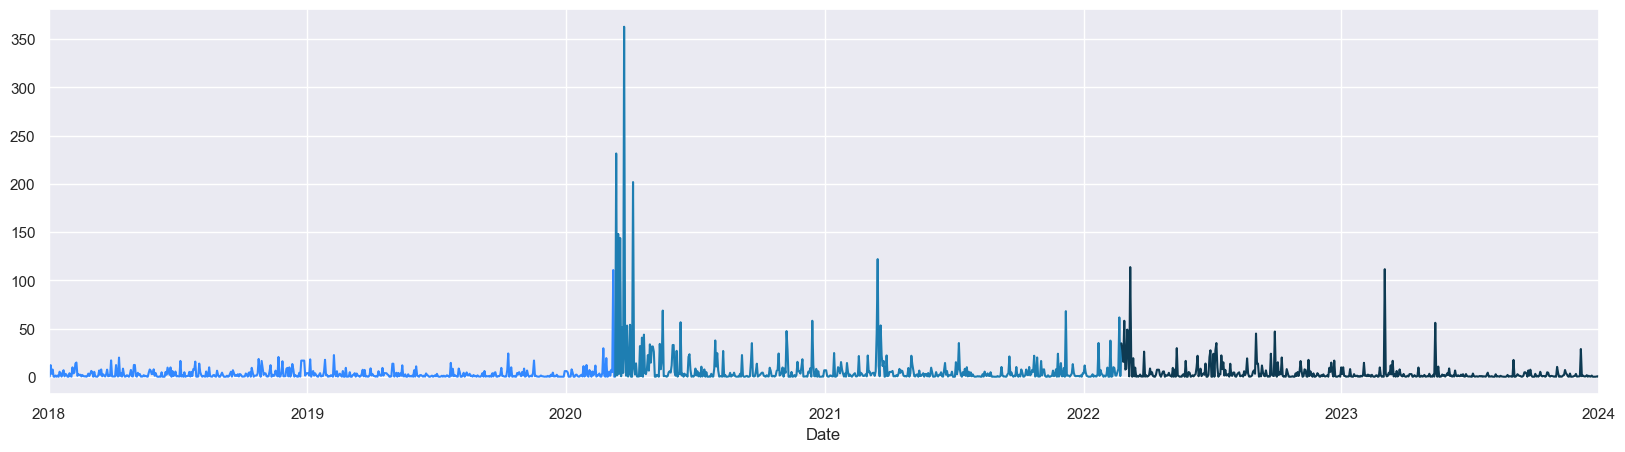

In [58]:
df['sq_vol'][start_date:ann_1].plot(figsize=(20, 5), color="#3388FF")
df['sq_vol'][ann_1:ann_2].plot(color="#1E7EB2")
df['sq_vol'][ann_2:end_date].plot(color="#0E3A52")
plt.show()

In [59]:
model_garch_pre = arch_model(df.ret_vol[start_date:ann_1], mean="Constant", vol="GARCH", p=1, q=1)
results_garch_pre = model_garch_pre.fit(update_freq=5)

model_garch_btn = arch_model(df.ret_vol[ann_1:ann_2], mean="Constant", vol="GARCH", p=1, q=1)
results_garch_btn = model_garch_btn.fit(update_freq=5)

model_garch_post = arch_model(df.ret_vol[ann_2:end_date], mean="Constant", vol="GARCH", p=1, q=1)
results_garch_post = model_garch_post.fit(update_freq=5)

Iteration:      5,   Func. Count:     39,   Neg. LLF: 1116.5588585831529
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1116.5581314691808
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1285.3566585485469
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1184.3717592145829
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1184.3715437784645
            Iterations: 13
            Function evaluations: 77
            Gradient evaluations: 13
Iteration:      5,   Func. Count:     33,   Neg. LLF: 1000.784594582422
Iteration:     10,   Func. Count:     61,   Neg. LLF: 984.1407039565612
Iteration:     15,   Func. Count:     86,   Neg. LLF: 984.1374949022934
Optimization terminated successfully    (Exit mode 0)
            Current function value: 984.1374949022817
            Iterations: 15
            

In [61]:
results_garch_pre.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1116.56
Distribution:                  Normal   AIC:                           2241.12
Method:            Maximum Likelihood   BIC:                           2258.52
                                        No. Observations:                  573
Date:                Sun, Dec 15 2024   Df Residuals:                      572
Time:                        18:09:23   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0393  7.180e-02      0.547      0.584 [ -0.101,  0.180]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.0885  5.522e-02      1.603      0.109 [-1.972e-02,  0.197]
alpha[1]       0.0551  2.824e-02      1.952  5.089e-02 [-2.143e-04,  0.110]
beta[1]        0.9188  2.471e-02     37.179 1.506e-302    [  0.870,  0.967]
===========================================================================

Covariance estimator: robust
"""

In [62]:
results_garch_post.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                ret_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -984.137
Distribution:                  Normal   AIC:                           1976.27
Method:            Maximum Likelihood   BIC:                           1993.00
                                        No. Observations:                  483
Date:                Sun, Dec 15 2024   Df Residuals:                      482
Time:                        18:09:23   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0700  8.437e-02      0.830      0.407 [-9.533e-02,  0.235]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2419      0.192      1.260      0.208    [ -0.134,  0.618]
alpha[1]       0.0452  2.910e-02      1.552      0.121 [-1.187e-02,  0.102]
beta[1]        0.8797  6.832e-02     12.876  6.111e-38    [  0.746,  1.014]
===========================================================================

Covariance estimator: robust
"""